In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import utils
%matplotlib notebook

def add_len(df):
    df['tags_len'] = [len(tags) for tags in df['tags']]


def show_data(df):
    add_len(df)
    plt.hist(x=df['tags_len'])
    print(df['tags_len'].describe())

In [2]:
file_list = ['a_example.txt', 'b_lovely_landscapes.txt', 'c_memorable_moments.txt', 'd_pet_pictures.txt', 'e_shiny_selfies.txt']

images = utils.read_file(file_list[2])
df = pd.DataFrame(data=images)
df.head()

,id,type,tags
0,0,V,"[tw52, t17, tmz1, t1l, t8b1, tg6, tjb1]"
1,1,H,"[twt1, tzb1, trn, t6c, t81, tgr, tc51]"
2,2,V,"[t001, t201, t81, tg11, td7, t652, t4q, tb6]"
3,3,H,"[tms, t0c, t8b1, tl3, tg02, tqz1, twd1, tqp1, ..."
4,4,H,"[t9q1, t2m1, tld1, tt, tpb, t6r1, t892, tsj1, ..."


In [3]:
verticals = df[df['type'] == 'V']
horizontals = df[df['type'] == 'H']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


<IPython.core.display.Javascript object>


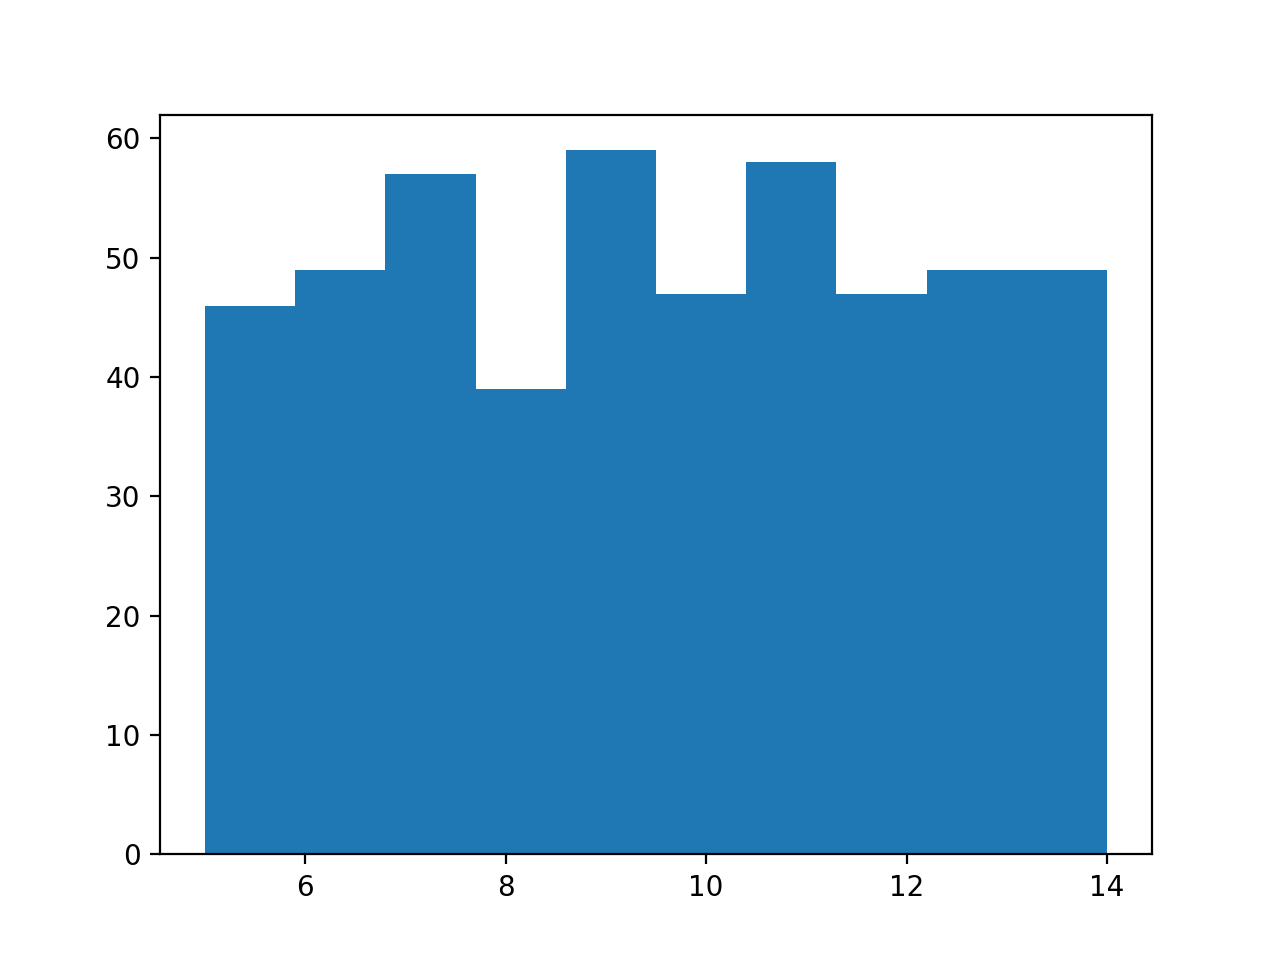

count    500.000000
mean       9.522000
std        2.837891
min        5.000000
25%        7.000000
50%        9.500000
75%       12.000000
max       14.000000
Name: tags_len, dtype: float64


In [9]:
show_data(verticals)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


<IPython.core.display.Javascript object>


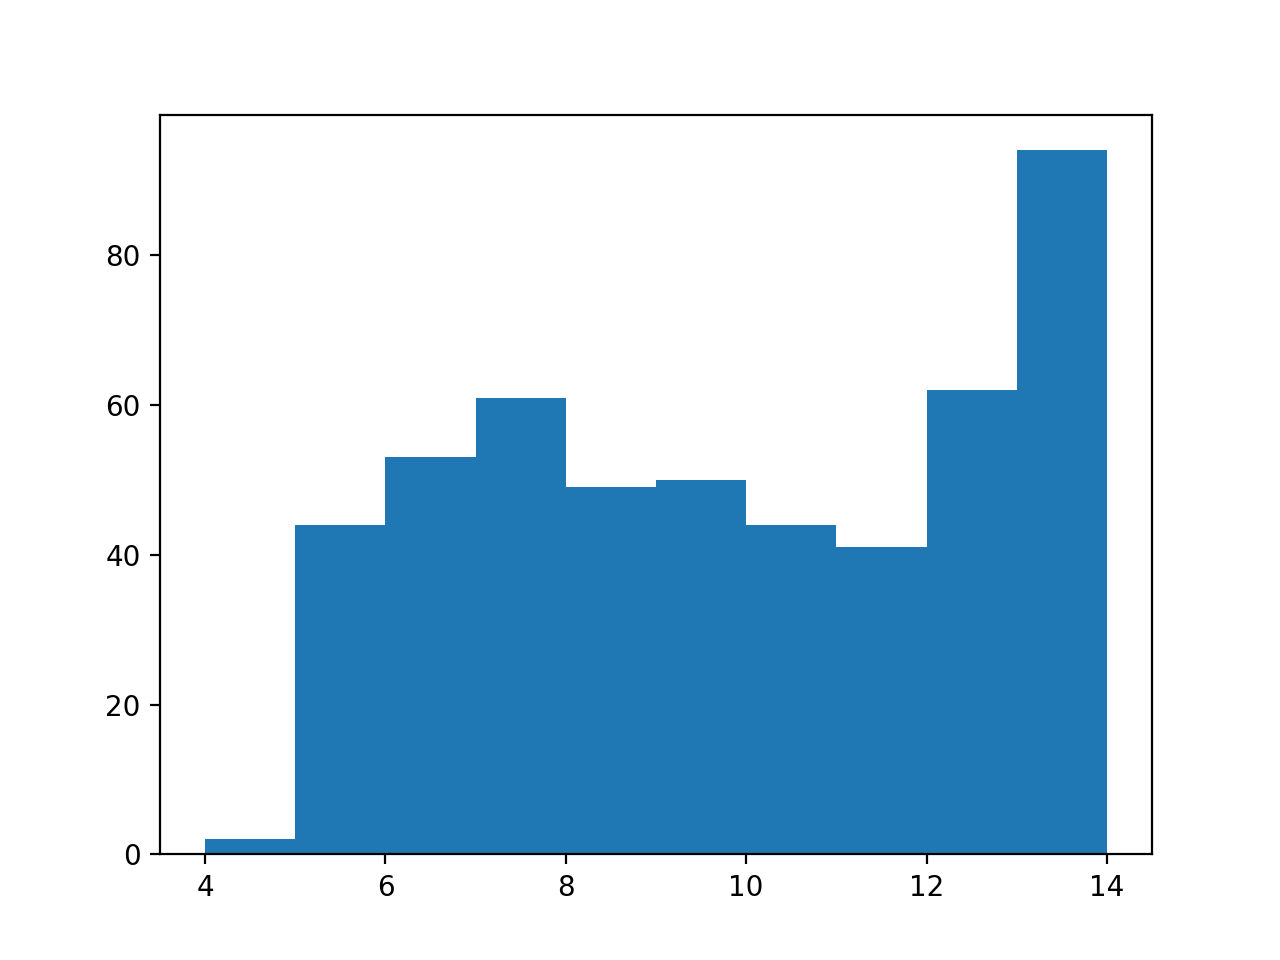

count    500.000000
mean       9.430000
std        2.862427
min        4.000000
25%        7.000000
50%        9.000000
75%       12.000000
max       14.000000
Name: tags_len, dtype: float64


In [10]:
show_data(horizontals)

<IPython.core.display.Javascript object>


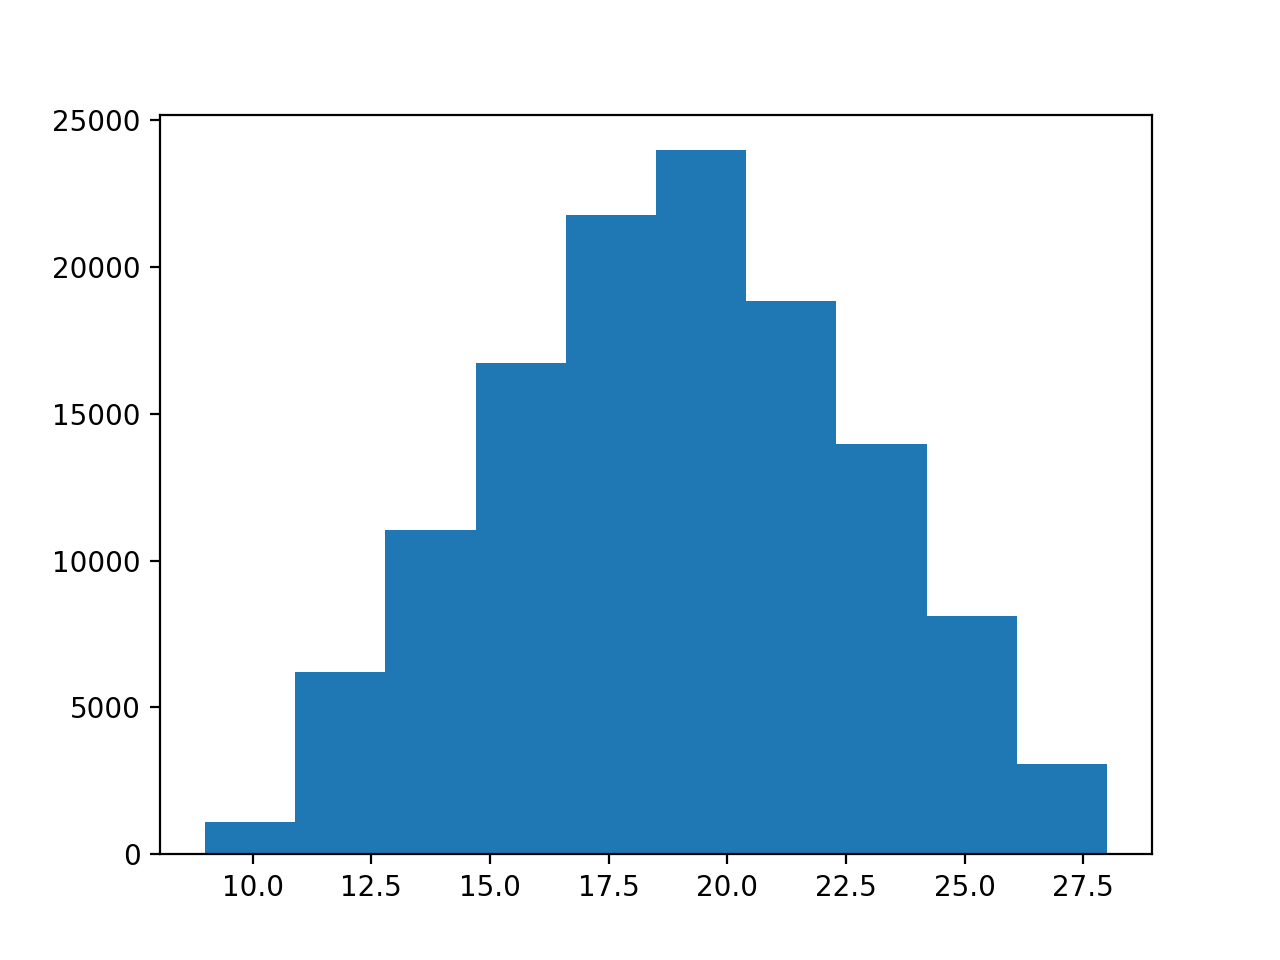

,len_tags
count,124750.000000
mean,18.934261
std,3.971269
min,9.000000
25%,16.000000
50%,19.000000
75%,22.000000
max,28.000000


In [14]:
combined_vertical = []
for i, tags_i in enumerate(verticals['tags']):
    for tags_j in verticals['tags'][i+1:]:
        tags = set(tags_i + tags_j)
        combined_vertical.append((tags, len(tags)))

combined_vertical = pd.DataFrame(data=combined_vertical, columns=['tags', 'len_tags'])

plt.hist(x=combined_vertical['len_tags'])
combined_vertical.describe()

In [15]:
transactions = []
for h_tags in horizontals['tags']:
    for c_tags in combined_vertical['tags']:
        h_set, c_set = set(h_tags), set(c_tags)
        intersection = len(h_set & c_set)
        h_left = len(h_set - c_set)
        c_left = len(c_set - h_set)
        transactions.append((h_tags, c_tags, intersection, h_left, c_left))

In [17]:
transactions = pd.DataFrame(data=transactions, columns=['horiz_tags', 'combined_tags', 'intersection', 'only_horiz', 'only_comb'])
transactions.describe()

,intersection,only_horiz,only_comb
count,6.237500e+07,6.237500e+07,6.237500e+07
mean,2.089108e-01,9.221089e+00,1.872535e+01
std,4.555138e-01,2.834727e+00,3.953474e+00
min,0.000000e+00,1.000000e+00,6.000000e+00
25%,0.000000e+00,7.000000e+00,1.600000e+01
50%,0.000000e+00,9.000000e+00,1.900000e+01
75%,0.000000e+00,1.200000e+01,2.200000e+01
max,5.000000e+00,1.400000e+01,2.800000e+01
